# 김가네 팀플 (8) 머신러닝 - 랜덤포레스트_ 230706

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('mode.chained_assignment',  None)

In [4]:
%%html
<style>
.output_stderr {
    display: none;
}
</style>

In [81]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('data/CS_final_ctg.csv', encoding='euc-kr')
CS.info()
CS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30763 entries, 0 to 30762
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       30763 non-null  int64
 1   where_cnt      30763 non-null  int64
 2   attend_cnt     30763 non-null  int64
 3   volunteer_cnt  30763 non-null  int64
 4   history_cnt    30763 non-null  int64
 5   standard       30763 non-null  int64
 6   block          30763 non-null  int64
 7   expense        30763 non-null  int64
 8   expense_f      30763 non-null  int64
 9   difficulty     30763 non-null  int64
 10  intention      30763 non-null  int64
 11  history        30763 non-null  int64
 12  history_f      30763 non-null  int64
 13  sex            30763 non-null  int64
 14  age            30763 non-null  int64
 15  education      30763 non-null  int64
 16  married        30763 non-null  int64
 17  work           30763 non-null  int64
 18  income         30763 non-null  int64
 19  sido

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,standard,block,expense,expense_f,difficulty,...,history,history_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,1,1,6,6,3,...,1,6,2,5,3,1,5,3,1,1
1,3,5,1,0,1,2,6,6,1,1,...,1,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,2,1,7,7,1,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,1,2,6,6,4,...,2,4,2,4,4,2,5,5,1,1
4,16,3,2,0,2,2,1,6,6,4,...,1,5,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,10,0,0,0,0,3,3,6,6,6,...,2,6,1,3,4,1,1,4,11,1
30759,20,8,4,0,5,3,3,6,6,3,...,1,6,2,1,3,1,5,4,10,1
30760,0,0,0,0,0,5,8,9,9,3,...,2,6,1,7,2,2,5,2,16,1
30761,0,0,0,0,0,1,6,9,1,6,...,2,4,2,6,4,2,5,4,17,1


## 데이터 전처리
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링

### 연속형 종속변수 범주형으로 변경
- view_cnt 열을 범주형으로 변경하여 진행

---

## 랜덤포레스트 분류 분석을 위해 추가 전처리
- view_cnt 열은 pd.cut()이용하여 카테고리화 진행할 때 labels를 문자가 아니라 숫자로 변경

In [82]:
# 랜덤포레스트를 위한 데이터프레임 추출
CS_rf = CS.copy()
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,standard,block,expense,expense_f,difficulty,...,history,history_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,1,1,6,6,3,...,1,6,2,5,3,1,5,3,1,1
1,3,5,1,0,1,2,6,6,1,1,...,1,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,2,1,7,7,1,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,1,2,6,6,4,...,2,4,2,4,4,2,5,5,1,1
4,16,3,2,0,2,2,1,6,6,4,...,1,5,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,10,0,0,0,0,3,3,6,6,6,...,2,6,1,3,4,1,1,4,11,1
30759,20,8,4,0,5,3,3,6,6,3,...,1,6,2,1,3,1,5,4,10,1
30760,0,0,0,0,0,5,8,9,9,3,...,2,6,1,7,2,2,5,2,16,1
30761,0,0,0,0,0,1,6,9,1,6,...,2,4,2,6,4,2,5,4,17,1


### 기타 전처리 진행
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링

In [83]:
# 연령대 50, 60대만 포함
CS_rf = CS_rf[(CS_rf['age'] == 5) | (CS_rf['age'] == 6)]

In [84]:
# 시도 서울, 경기만 포함
CS_rf = CS_rf[(CS_rf['sido'] == 1) | (CS_rf['sido'] == 9)]

---
## Target 데이터 범주 축소 : 8개 --> 3개
- 타겟 범주 기준 통일
- [상, 중, 하] 총 3개의 카테고리로 관람횟수(참여도) 범주 분리
- 참여도(하) : 최솟값 ~ 제 1 사분위수
- 참여도(중) : 제 1 사분위수 ~ 평균
- 참여도(상) : 평균 ~ 최댓값

### 문제점 발견!!!
- 필터링이 안되어있는 데이터로 (즉, 시니어가 아닌 전체 데이터의 사분위수와 평균값을 이용하고 있음)
- 시니어를 기준으로 범주화를 하는 게 옳지 않을까?!

In [86]:
CS['view_cnt'].describe()

count    30763.000000
mean        20.128271
std         32.901611
min          0.000000
25%          5.000000
50%         11.000000
75%         23.000000
max        730.000000
Name: view_cnt, dtype: float64

In [85]:
# 시니어 및 수도권으로 필터링 된 데이터셋 (CS_rf)
CS_rf['view_cnt'].describe()

count    3007.000000
mean       15.795145
std        29.732920
min         0.000000
25%         3.000000
50%         8.000000
75%        18.000000
max       672.000000
Name: view_cnt, dtype: float64

In [73]:
# target 범주화
target_min = min(CS['view_cnt'])
target_max = max(CS['view_cnt'])

target_ranges = [target_min-1, 5, 20, target_max]
labels = [1, 2, 3]
CS_rf['target'] = pd.cut(CS_rf['view_cnt'], bins=target_ranges, labels=labels)

In [74]:
# 범주화 확인
CS_rf['target'].value_counts().sort_index()

target
1     556
2    1009
3     579
Name: count, dtype: int64

### 머신러닝 학습 전 최종 전처리 완료된 데이터프레임 확인
- 데이터 개수 :  2144

In [75]:
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival_f,sex,age,education,married,work,income,sido,disabled,target
0,49,0,0,0,5,0,1,1,14,14,...,6,2,5,3,1,5,3,1,1,3
1,3,3,3,0,1,0,2,6,14,9,...,7,2,5,3,2,5,7,1,1,1
6,22,15,0,0,0,0,2,2,14,14,...,5,2,5,4,3,1,5,1,1,3
7,10,0,0,0,2,2,2,4,17,11,...,6,1,5,4,2,1,6,1,1,2
9,7,0,0,0,0,0,3,2,15,12,...,5,2,5,3,2,1,5,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,21,0,0,0,0,0,5,4,12,12,...,5,1,5,4,2,1,3,9,1,3
20599,23,0,0,0,1,0,1,1,17,12,...,5,2,5,3,2,1,6,9,1,3
20605,30,1,0,0,1,0,4,1,8,8,...,4,2,6,2,2,3,4,9,1,3
20618,7,2,0,0,4,0,1,2,16,16,...,5,2,5,3,2,3,6,1,1,2


---

## 랜덤포레스트 학습 및 예측 진행
1. train_test_split 이용해서 train 데이터와 test 데이터 나누기
2. 의사결정나무(결정트리) 먼저 사용해서 모델 성능(정확도) 확인
3. 랜덤포레스트 사용해서 모델 성능(정확도)확인

### train, test 데이터 분리
- 분리 전 'sido', 'age' 열 삭제!!

In [76]:
# 분리 전 데이터프레임 확인
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival_f,sex,age,education,married,work,income,sido,disabled,target
0,49,0,0,0,5,0,1,1,14,14,...,6,2,5,3,1,5,3,1,1,3
1,3,3,3,0,1,0,2,6,14,9,...,7,2,5,3,2,5,7,1,1,1
6,22,15,0,0,0,0,2,2,14,14,...,5,2,5,4,3,1,5,1,1,3
7,10,0,0,0,2,2,2,4,17,11,...,6,1,5,4,2,1,6,1,1,2
9,7,0,0,0,0,0,3,2,15,12,...,5,2,5,3,2,1,5,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,21,0,0,0,0,0,5,4,12,12,...,5,1,5,4,2,1,3,9,1,3
20599,23,0,0,0,1,0,1,1,17,12,...,5,2,5,3,2,1,6,9,1,3
20605,30,1,0,0,1,0,4,1,8,8,...,4,2,6,2,2,3,4,9,1,3
20618,7,2,0,0,4,0,1,2,16,16,...,5,2,5,3,2,3,6,1,1,2


In [77]:
# 피처 데이터 세트 / 타겟 데이터 세트 만들기
CS_X_df = CS_rf.drop(columns=['view_cnt', 'target', 'sido', 'age'], axis=1)
CS_y_df = CS_rf['target']

# 피쳐 데이터 세트 / 타겟 데이터 세트 확인
CS_X_df
CS_y_df

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,history,history_f,festival,festival_f,sex,education,married,work,income,disabled
0,0,0,0,5,0,1,1,14,14,3,...,1,6,2,6,2,3,1,5,3,1
1,3,3,0,1,0,2,6,14,9,1,...,1,7,2,7,2,3,2,5,7,1
6,15,0,0,0,0,2,2,14,14,5,...,2,4,2,5,2,4,3,1,5,1
7,0,0,0,2,2,2,4,17,11,2,...,1,6,1,6,1,4,2,1,6,1
9,0,0,0,0,0,3,2,15,12,2,...,2,5,2,5,2,3,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,12,12,1,...,2,5,2,5,1,4,2,1,3,1
20599,0,0,0,1,0,1,1,17,12,1,...,1,4,2,5,2,3,2,1,6,1
20605,1,0,0,1,0,4,1,8,8,2,...,1,5,2,4,2,2,2,3,4,1
20618,2,0,0,4,0,1,2,16,16,2,...,1,6,2,5,2,3,2,3,6,1


0        3
1        1
6        3
7        2
9        2
        ..
20595    3
20599    3
20605    3
20618    2
20621    1
Name: target, Length: 2144, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [78]:
# 학습 / 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_X_df,
                                                   CS_y_df,
                                                   test_size=0.3,
                                                   random_state=11)

In [79]:
# 랜덤포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0, n_estimators=300)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('랜덤 포레스트 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(n_estimators=300, random_state=0)

랜덤 포레스트 예측 정확도 : 0.5326


## 하이퍼 파라미터 튜닝

In [54]:
# 하이퍼 파라미터 튜닝 
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [5,6,7,8],
    'min_samples_split' : [4,5,6],
    'min_samples_leaf' : [2,3,4]
}

grid_rclf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)

grid_rclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_rclf.best_params_)
print('최적 하이퍼 파라미터의 최고 정확도 : {0:.4f}'.format(grid_rclf.best_score_))

best_rclf = grid_rclf.best_estimator_

y_pred = best_rclf.predict(X_test)

print('튜닝 후 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
최적 하이퍼 파라미터의 최고 정확도 : 0.5160
튜닝 후 정확도 : 0.5171


In [61]:
# 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.5342
# 튜닝 후 정확도 : 0.5537

#### 튜닝된 하이퍼 파라미터로 다시 학습/예측/평가 수행

In [55]:
rf_clf = RandomForestClassifier(n_estimators=300,
                                max_depth=8,
                               min_samples_leaf=2,
                               min_samples_split=4)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('최적 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=300)

최적 정확도 : 0.5295


### 개별 feature들의 중요도 시각화

<Axes: >

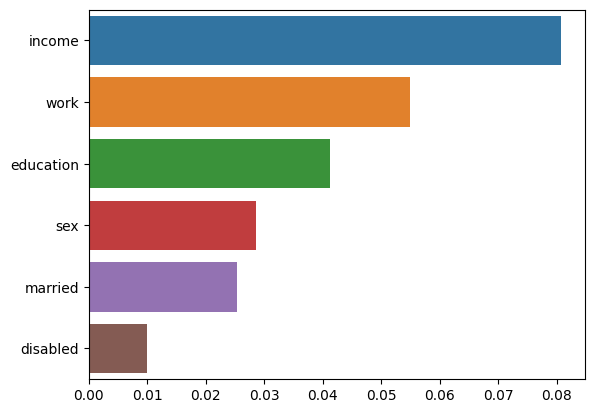

In [98]:
# 피처 중요도가 높은 20개의 피처만 
f_imp = rf_clf.feature_importances_
feature_importances = pd.Series(f_imp, index=X_train.columns).sort_values(ascending=False)
feature_importances = feature_importances[:20]
feature_importances = feature_importances.loc[['income', 'work', 'education', 'sex', 'married', 'disabled']]

sns.barplot(x=feature_importances, y=feature_importances.index)

## 예측값 데이터셋에 가공열로 추가

In [32]:
# 예측값 생성
y_pred = rf_clf.predict(CS_X_df)

In [33]:
# 저장할 데이터셋 복사
CS_pred = CS.copy()

In [34]:
CS_pred

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,standard,block,expense,expense_f,difficulty,...,history,history_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,1,1,6,6,3,...,1,6,2,5,3,1,5,3,1,1
1,3,5,1,0,1,2,6,6,1,1,...,1,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,2,1,7,7,1,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,1,2,6,6,4,...,2,4,2,4,4,2,5,5,1,1
4,16,3,2,0,2,2,1,6,6,4,...,1,5,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,10,0,0,0,0,3,3,6,6,6,...,2,6,1,3,4,1,1,4,11,1
30759,20,8,4,0,5,3,3,6,6,3,...,1,6,2,1,3,1,5,4,10,1
30760,0,0,0,0,0,5,8,9,9,3,...,2,6,1,7,2,2,5,2,16,1
30761,0,0,0,0,0,1,6,9,1,6,...,2,4,2,6,4,2,5,4,17,1


In [35]:
# 연령대 50, 60대만 포함
CS_pred = CS_pred[(CS_pred['age'] == 5) | (CS_pred['age'] == 6)]

In [36]:
# 시도 서울, 경기만 포함
CS_pred = CS_pred[(CS_pred['sido'] == 1) | (CS_pred['sido'] == 9)]

In [37]:
# 예측값 가공열 생성
CS_pred['pred'] = y_pred

In [38]:
# 타겟값 가공열 생성
CS_pred['target'] = CS_y_df

In [39]:
# 머신러닝 완료된 최종 데이터프레임 확인
CS_pred

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,standard,block,expense,expense_f,difficulty,...,sex,age,education,married,work,income,sido,disabled,pred,target
0,49,0,0,0,5,1,1,6,6,3,...,2,5,3,1,5,3,1,1,2,3
1,3,5,1,0,1,2,6,6,1,1,...,2,5,3,2,5,7,1,1,2,1
6,22,15,0,0,0,2,2,6,6,5,...,2,5,4,3,1,5,1,1,2,3
7,10,0,0,0,2,2,4,9,3,2,...,1,5,4,2,1,6,1,1,2,2
9,7,0,0,0,0,3,2,7,4,2,...,2,5,3,2,1,5,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30535,8,0,0,0,2,1,3,6,6,6,...,2,5,3,2,5,6,9,1,2,2
30538,0,6,6,0,3,2,6,6,6,6,...,2,6,3,2,5,5,9,1,2,1
30540,2,0,0,0,1,2,3,6,6,3,...,1,6,4,2,5,7,9,1,2,1
30746,16,1,1,0,0,2,2,6,6,2,...,1,6,3,2,1,4,1,1,2,2


In [40]:
# 파일로 저장
CS_pred.to_csv('CS_pred_contest.csv', index=False)